In [34]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame
from math import *

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps
import cartopy.crs as ccrs

In [2]:
file   = 'MERRA2_300.inst3_3d_asm_Np.20090109.nc4'
ds=xr.open_dataset(file)

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lev: 42, lon: 576, time: 8)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * time     (time) datetime64[ns] 2009-01-09 ... 2009-01-09T21:00:00
Data variables: (12/14)
    EPV      (time, lev, lat, lon) float32 ...
    H        (time, lev, lat, lon) float32 ...
    O3       (time, lev, lat, lon) float32 ...
    OMEGA    (time, lev, lat, lon) float32 ...
    PHIS     (time, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    ...       ...
    QV       (time, lev, lat, lon) float32 ...
    RH       (time, lev, lat, lon) float32 ...
    SLP      (time, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Mon Feb 16 04...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_asm_Np.20090109.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/QBZ6MG944HW0
    RangeBeginningDate:                2009-01-09
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2009-01-09
    RangeEndingTime:                   21:00:00.000000

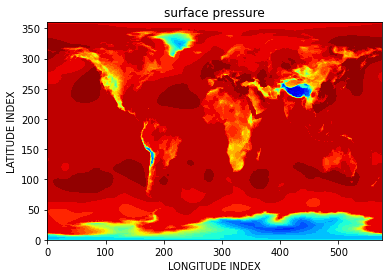

In [4]:
plt.figure(1)
plt.contourf(ds.PS[0,:,:],30,cmap='jet')
plt.xlabel('LONGITUDE INDEX')
plt.ylabel('LATITUDE INDEX')
plt.title('surface pressure')

plt.show()

In [5]:
boulder=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=40,method='nearest')
height= -np.log(boulder.lev*0.001)*8.
wind_speed=np.sqrt(np.power(boulder.U,2) + np.power(boulder.V,2))
north_pole=ds.sel(time='2009-01-09T18:00:00', lon=-105.7,lat=90,method='nearest')
wind_speedNP=np.sqrt(np.power(north_pole.U,2) + np.power(north_pole.V,2))


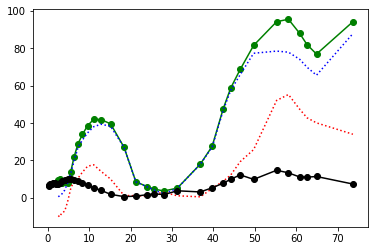

In [6]:
plt.plot(height,wind_speed,'go-')
plt.plot(height,boulder.U,'b:')
plt.plot(height,boulder.V,'r:')
plt.plot(height,wind_speedNP,'ko-')

In [7]:
boulder

<xarray.Dataset>
Dimensions:  (lev: 42)
Coordinates:
    lon      float64 -105.6
    lat      float64 40.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
    time     datetime64[ns] 2009-01-09T18:00:00
Data variables: (12/14)
    EPV      (lev) float32 ...
    H        (lev) float32 ...
    O3       (lev) float32 ...
    OMEGA    (lev) float32 ...
    PHIS     float32 ...
    PS       float32 ...
    ...       ...
    QV       (lev) float32 ...
    RH       (lev) float32 ...
    SLP      float32 ...
    T        (lev) float32 ...
    U        (lev) float32 nan nan nan nan nan ... 77.84 74.08 69.84 65.54 87.76
    V        (lev) float32 nan nan nan nan nan ... 55.22 47.44 42.82 40.08 34.0
Attributes: (12/30)
    History:                           Original file generated: Mon Feb 16 04...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_asm_Np.20090109.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/QBZ6MG944HW0
    RangeBeginningDate:                2009-01-09
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2009-01-09
    RangeEndingTime:                   21:00:00.000000

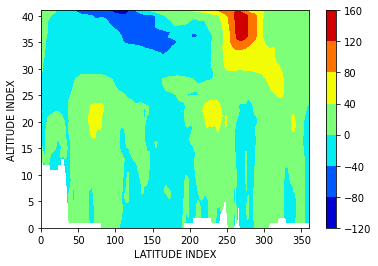

In [8]:
plt.contourf(ds.U.sel(time='2009-01-09T18:00:00',lon=0,method='nearest'),cmap='jet')
plt.xlabel('LATITUDE INDEX')
plt.ylabel('ALTITUDE INDEX')
plt.colorbar()

plt.show()

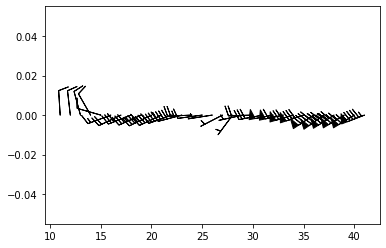

In [9]:
plt.barbs(boulder.U,boulder.V)

In [11]:
boulder


<xarray.Dataset>
Dimensions:  (lev: 42)
Coordinates:
    lon      float64 -105.6
    lat      float64 40.0
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
    time     datetime64[ns] 2009-01-09T18:00:00
Data variables: (12/14)
    EPV      (lev) float32 nan nan nan nan ... 0.005954 0.008424 0.01256 0.05293
    H        (lev) float32 nan nan nan nan ... 5.365e+04 5.569e+04 6.333e+04
    O3       (lev) float32 nan nan nan nan ... 2.402e-06 1.898e-06 9.011e-07
    OMEGA    (lev) float32 nan nan nan nan ... 0.0002487 0.0002659 6.919e-06
    PHIS     float32 2.663e+04
    PS       float32 7.302e+04
    ...       ...
    QV       (lev) float32 nan nan nan nan ... 3.902e-06 3.754e-06 3.085e-06
    RH       (lev) float32 nan nan nan nan ... 3.902e-06 3.753e-06 3.306e-06
    SLP      float32 1.022e+05
    T        (lev) float32 nan nan nan nan nan ... 259.1 250.5 245.1 240.8 232.4
    U        (lev) float32 nan nan nan nan nan ... 77.84 74.08 69.84 65.54 87.76
    V        (lev) float32 nan nan nan nan nan ... 55.22 47.44 42.82 40.08 34.0
Attributes: (12/30)
    History:                           Original file generated: Mon Feb 16 04...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_asm_Np.20090109.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/QBZ6MG944HW0
    RangeBeginningDate:                2009-01-09
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2009-01-09
    RangeEndingTime:                   21:00:00.000000

In [60]:
test=ds.sel(time='2009-01-09T00:00:00', lon=slice(-160,-145),lat=slice(55,90),lev=5)


xx, yy = np.meshgrid(test.lon,test.lat)
magnitude = (test.U ** 2 + test.V ** 2) ** 0.5

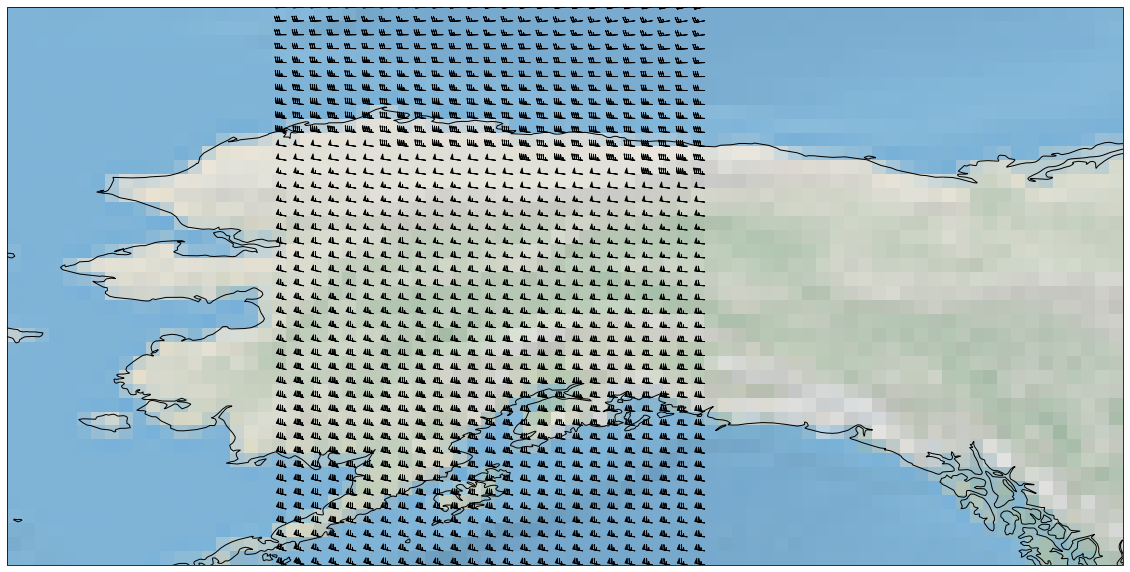

In [83]:


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-170, -130, 55, 75], crs=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.barbs(xx,yy,test.U,test.V, length=4.5,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
            linewidth=0.95, transform=ccrs.PlateCarree())
#ax.streamplot(xx,yy,test.U.to_array(),test.V.to_array(),transform=ccrs.PlateCarree(),linewidth=2, density=2, color=magnitude)
